# Step 1: Read, understand and explore the data

In [45]:
# Import necessary libraries and supress warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [46]:
# Read the data from csv file and check the head of the dataset

raw_data = pd.read_csv('day.csv')
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [47]:
# Checking the shape of dataframe

raw_data.shape

(730, 16)

In [48]:
# describing the columns of dataframe

raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [49]:
# getting information about the columns

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [50]:
# Checking for the null values in columns

raw_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [51]:
# renaming few columns for better readability

raw_data.rename(columns={'yr': 'year', 'mnth': 'month','hum': 'humidity'}, inplace=True)

In [52]:
# check the dataset

raw_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
# copying the dataframe into new to check for duplicates

raw_data_copy = raw_data.copy()

In [54]:
# checking the shape of new dataframe

raw_data_copy.shape

(730, 16)

In [55]:
# dropping the duplicates

raw_data_copy.drop_duplicates(inplace=True)

In [56]:
# re-checking the shape of new dataframe

raw_data_copy.shape

(730, 16)

#### As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

In [57]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month columns
# casual and registered seems to be the breakup by category for the cnt column

raw_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [58]:
# Encoding/mapping the season column

raw_data.season = raw_data.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [59]:
# Encoding/mapping the month column

raw_data.month=raw_data.month.map({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'})

In [60]:
# Encoding/mapping the weekday column

raw_data.weekday=raw_data.weekday.map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})

In [61]:
# Encoding /mapping the weathersit column

raw_data.weathersit=raw_data.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

In [62]:
# Checking the head of the dataset

raw_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,january,0,saturday,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [63]:
# checking the column info the dataset

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 2: Visualizing the data

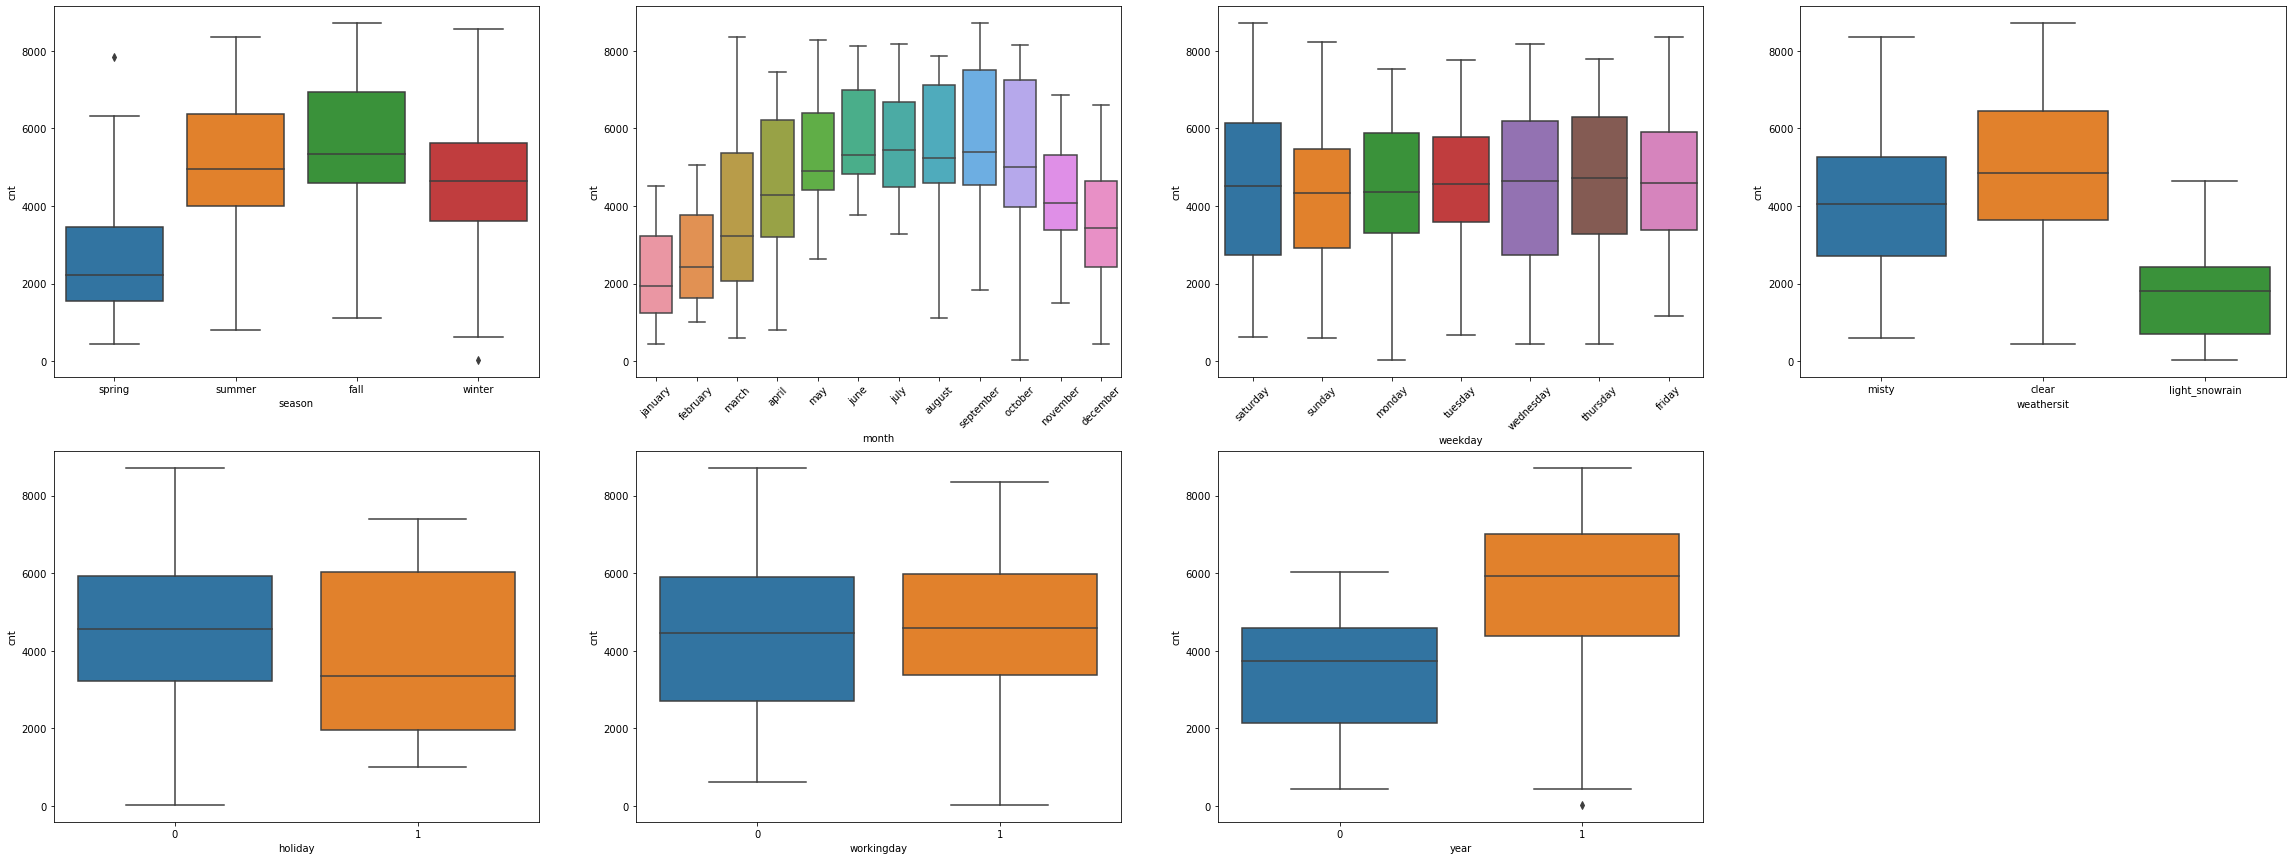

In [74]:
# Analyzing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(40,15))
plt.subplot(2,4,1)

sns.boxplot(x='season',y='cnt',data=raw_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = raw_data)
plt.xticks(rotation=45)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = raw_data)
plt.xticks(rotation=45)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = raw_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = raw_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = raw_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = raw_data)
plt.show()

In [96]:
# Function to create barplot related to categorical columns

def bar_plot_cat_col(column, rotate_axis_ticks = True):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=raw_data)
    if(rotate_axis_ticks):
        plt.xticks(rotation=45)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=raw_data,hue='year',palette='Set1')
    if(rotate_axis_ticks):
        plt.xticks(rotation=45)
    plt.legend(labels=['2018','2019'])
    plt.show()

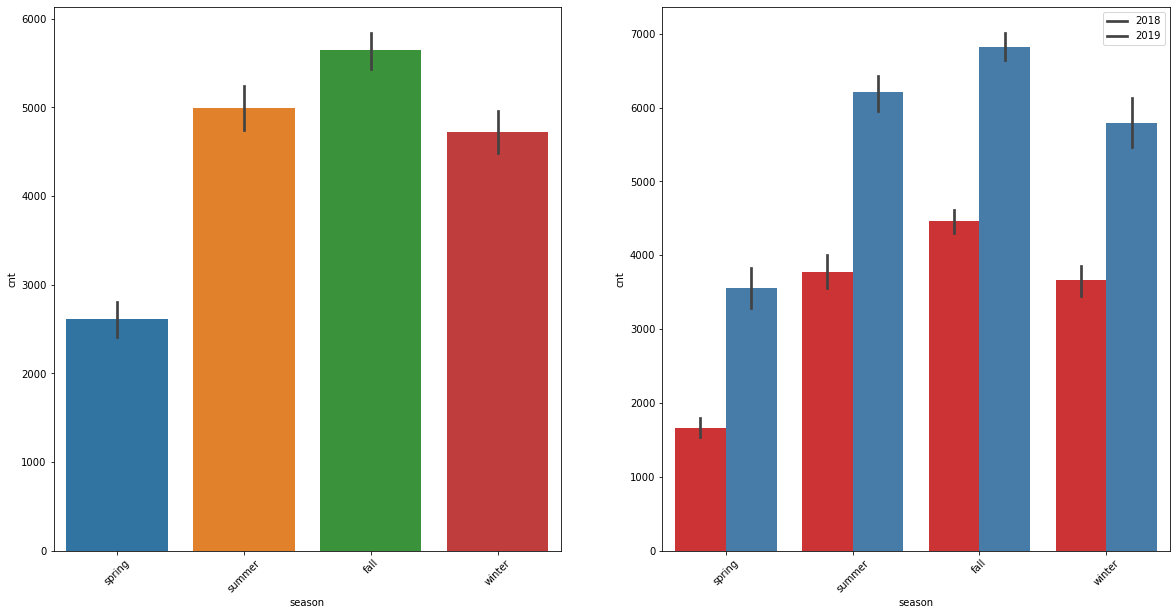

In [97]:
# Plotting visualization for season column

bar_plot_cat_col('season')

##### Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

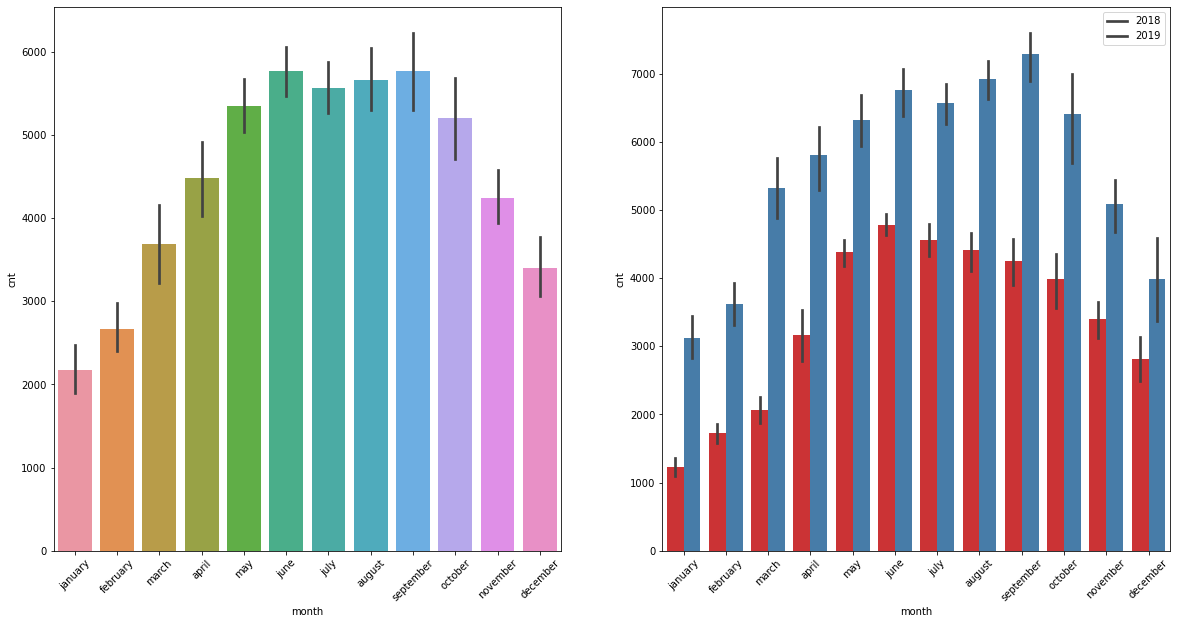

In [86]:
# Plotting visualization for month column

bar_plot_cat_col('month')

##### Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

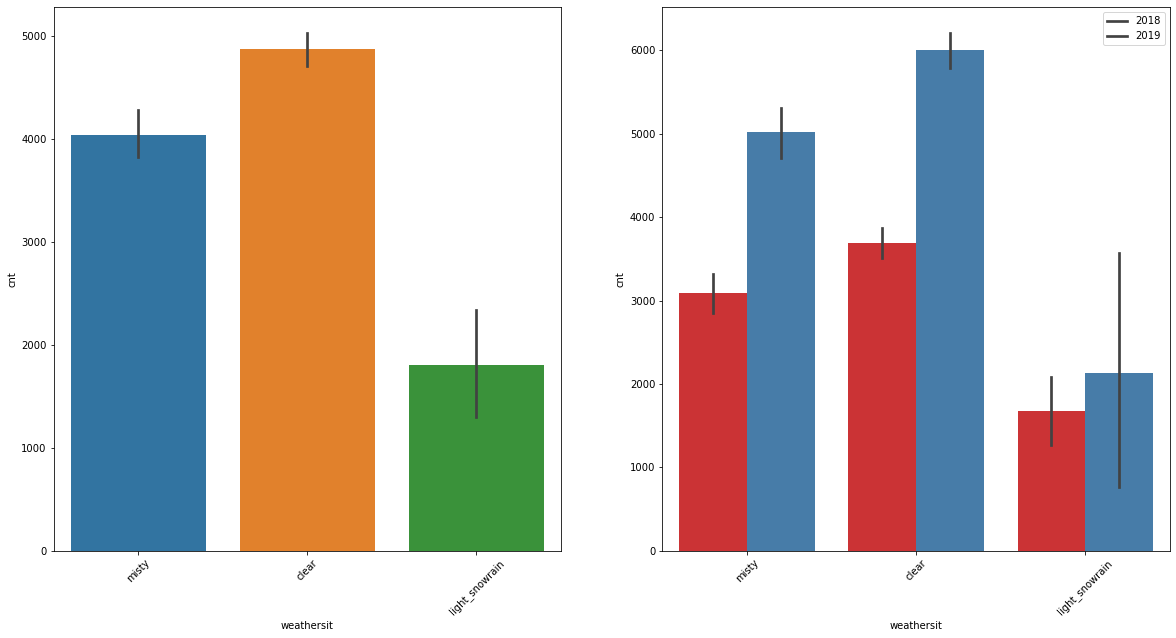

In [87]:
# Plotting visualization for weathersit column

bar_plot_cat_col('weathersit')

##### Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

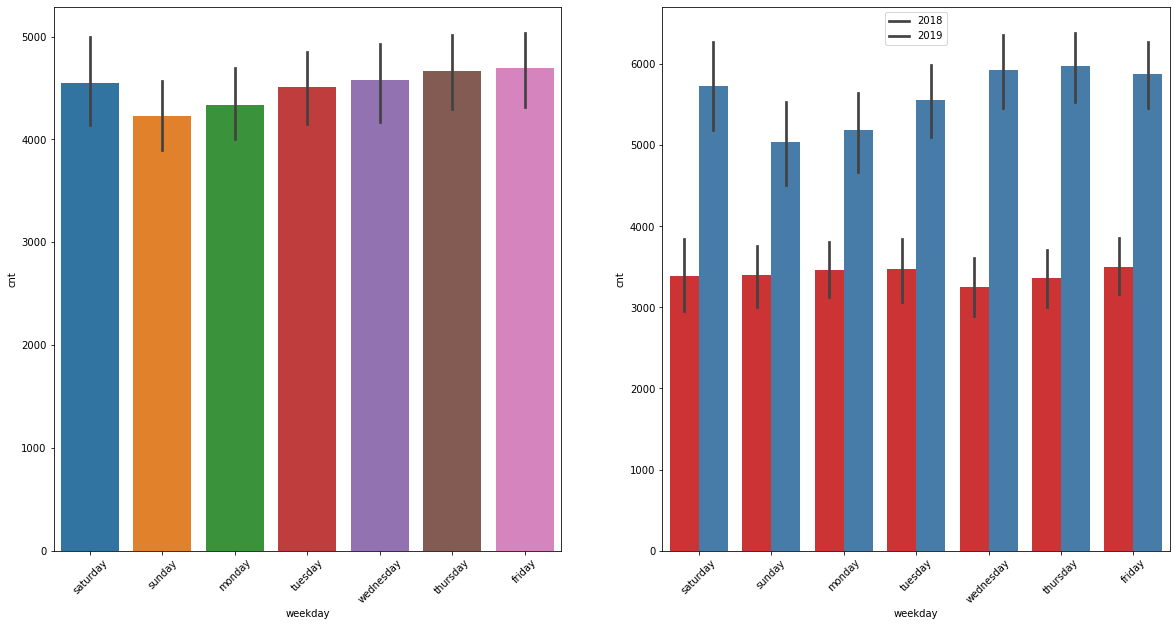

In [89]:
# Plotting visualization for weekday column

bar_plot_cat_col('weekday')

##### Saturday, Wednesday, Thursday and Friday have more number of bookings as compared to the rest of the week.

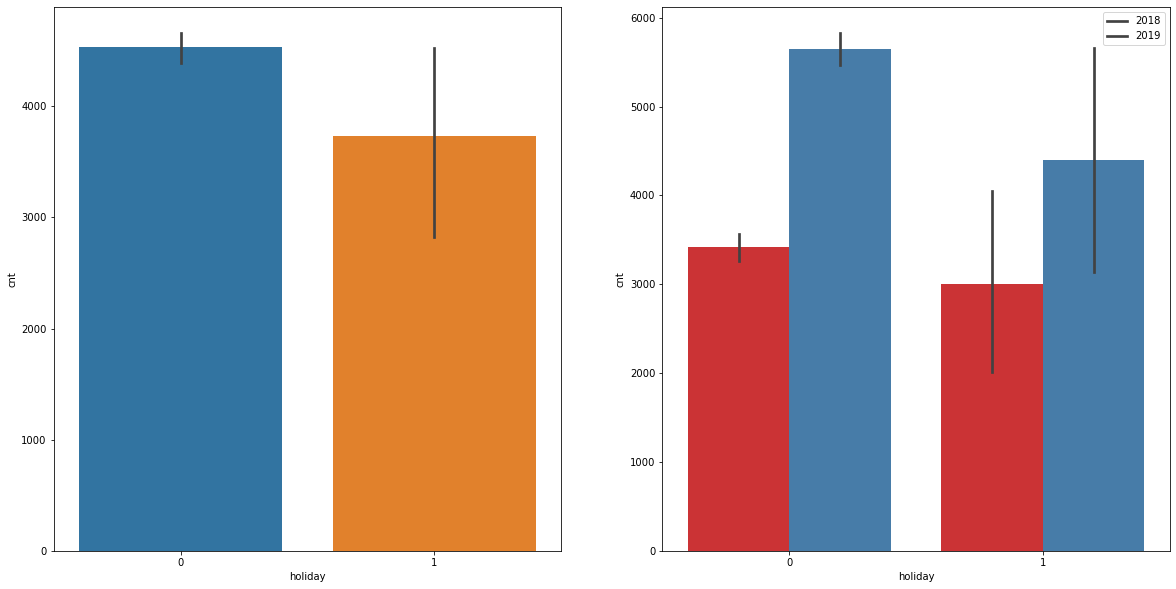

In [98]:
# Plotting visualization for holiday column

bar_plot_cat_col('holiday', False)

##### When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

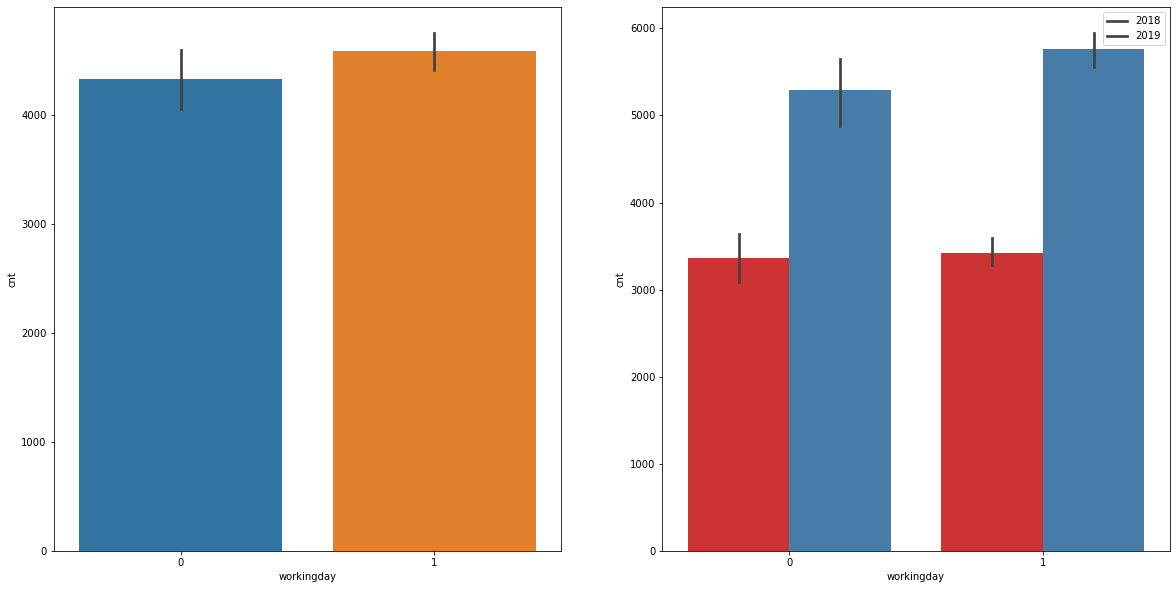

In [100]:
# Plotting visualization for workingday column

bar_plot_cat_col('workingday', False)

##### Booking seemed to be almost equal either on working day or non-working day. Or we can say there is not a significant difference. But, the count increased from 2018 to 2019.

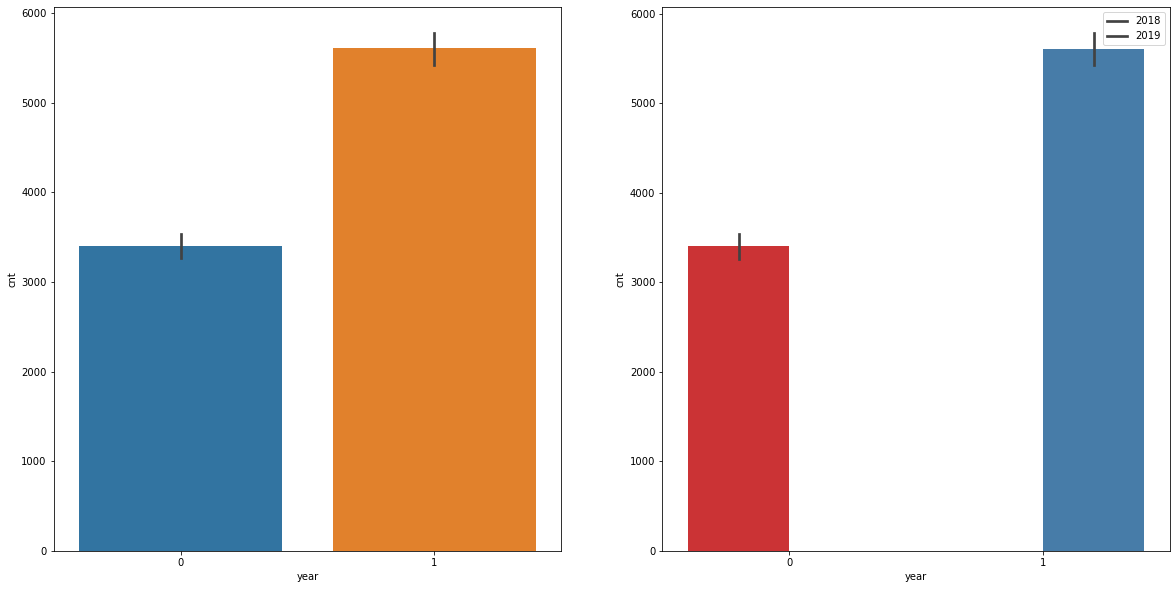

In [102]:
# Plotting visualization for year column

bar_plot_cat_col('year',False)

##### 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

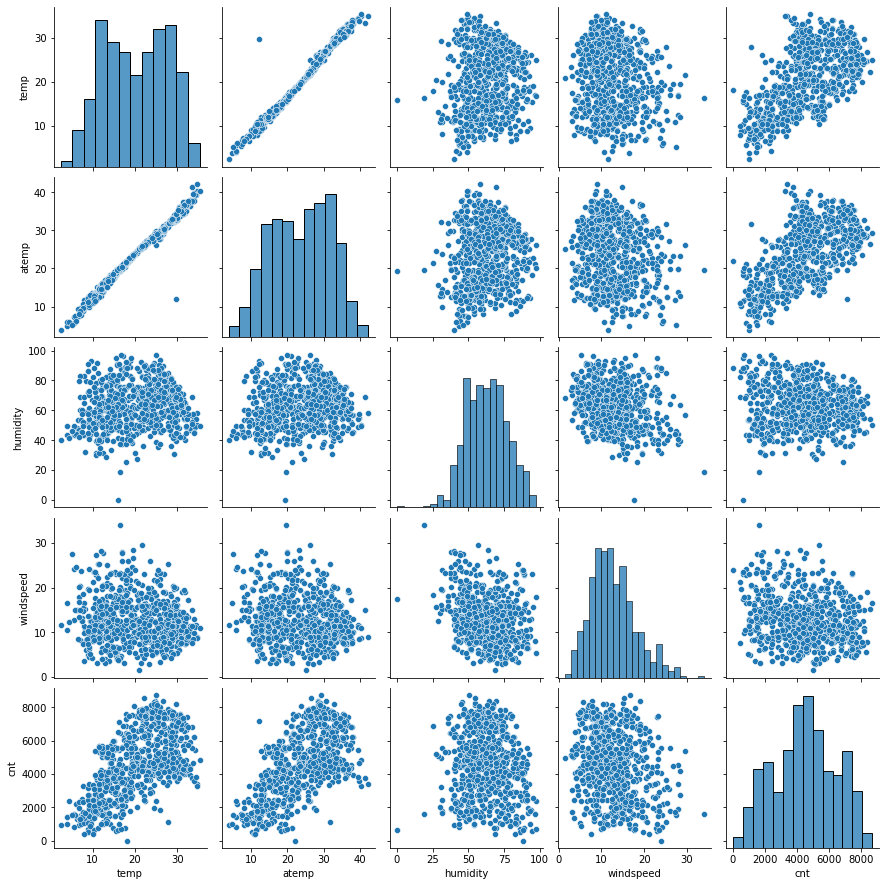

In [106]:
# Analyzing/visualizing the numerical columns

sns.pairplot(data=raw_data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

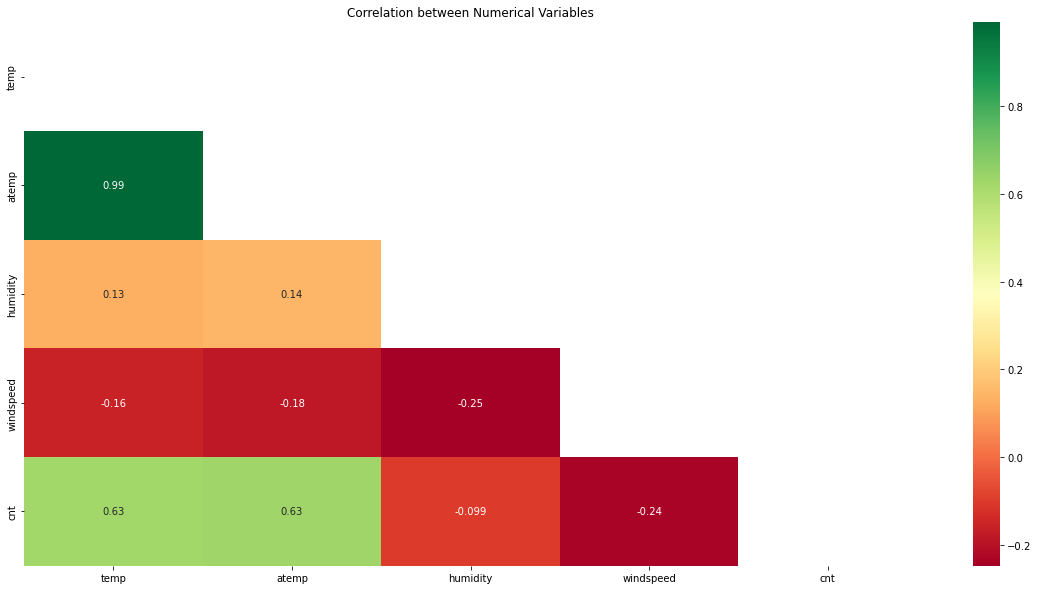

In [111]:
# Checking the correlation between numerical variables

raw_data.corr()
plt.figure(figsize=(20, 10))
matrix = np.triu(raw_data[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(raw_data[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

##### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multi-colinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Step 3: Data Preparation

In [113]:
# Dummy variable creation for month, weekday, weathersit, and season variable

months_df=pd.get_dummies(raw_data.month,drop_first=True)
weekdays_df=pd.get_dummies(raw_data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(raw_data.weathersit,drop_first=True)
season_df=pd.get_dummies(raw_data.season,drop_first=True)

In [114]:
raw_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,january,0,saturday,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [115]:
# Merging dataframe with the dummy variables

df = pd.concat([raw_data,months_df,weekdays_df,weathersit_df,season_df],axis=1)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
0,spring,0,january,0,saturday,0,misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,january,0,sunday,0,misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,january,0,monday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,tuesday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,january,0,wednesday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  august          730 non-null    uint8  
 13  december        730 non-null    uint8  
 14  february        730 non-null    uint8  
 15  january         730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [117]:
# Dropping unnecessary columns as we have already created dummy variables out of it

df.drop(['season','month','weekday','weathersit'],axis=1,inplace=True)

In [118]:
# Checking head of new dataframe

df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [119]:
# Check the shape of new dataframe

df.shape

(730, 30)

In [120]:
# Check the column info of new dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   august          730 non-null    uint8  
 9   december        730 non-null    uint8  
 10  february        730 non-null    uint8  
 11  january         730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  march           730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  november        730 non-null    uint8  
 17  october         730 non-null    uin

# Step 4: Splitting the data into training and test sets

In [122]:
# Splitting the dataframe into train and test

np.random.seed(0)
df_train, df_test = train_test_split(df,train_size=0.7,random_state=100)

In [124]:
# Checking the shape of train dataset

df_train.shape

(510, 30)

In [125]:
# Checking the shape of test dataset
df_test.shape

(220, 30)

In [126]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [127]:
# Verifying the head of dataset before scaling

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [128]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' columns

num_vars=['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [129]:
# verifying the head after scaling

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [130]:
# Describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


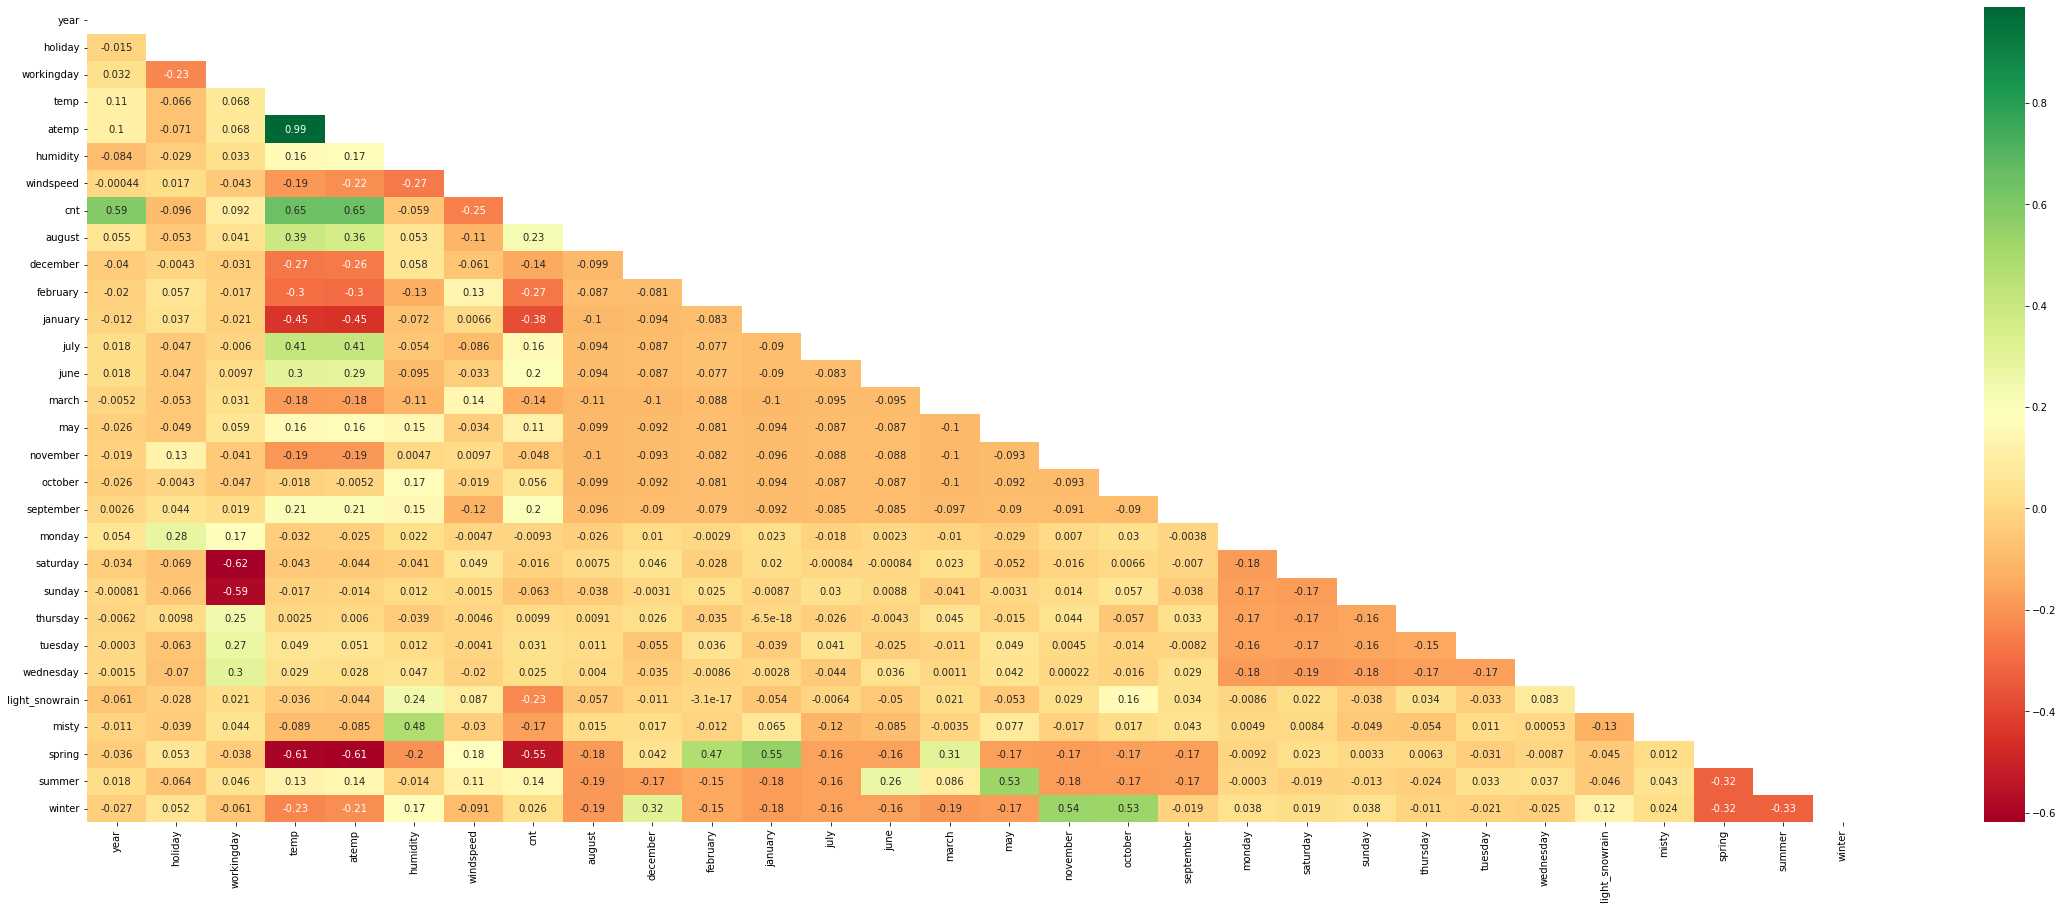

In [131]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(40,15))
matrix=np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot=True,cmap='RdYlGn',mask=matrix)
plt.show()

##### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

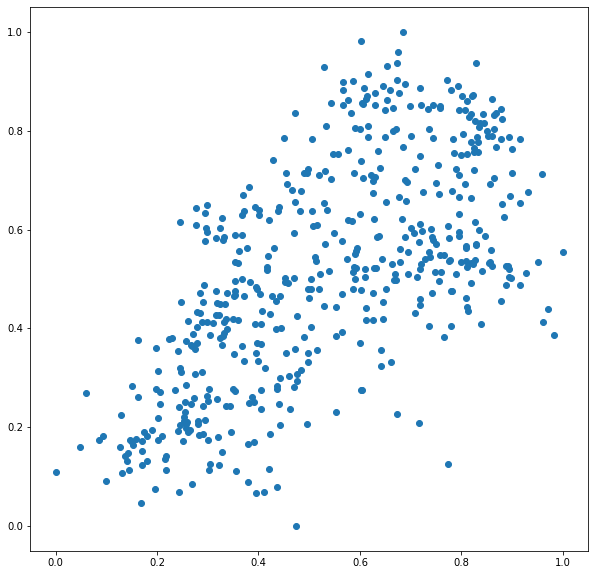

In [135]:
# Visualizing one of the correlation to see the trends via scatter plot

plt.figure(figsize=[10,10])
plt.scatter(df_train.temp,df_train.cnt)
plt.show()

##### Visualization confirms the positive correlation between temp and cnt.

In [137]:
# Building the linear model

y_train = df_train.pop('cnt')
X_train = df_train

In [144]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [145]:
# List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('august', False, 12),
 ('december', False, 4),
 ('february', False, 5),
 ('january', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 11),
 ('may', False, 6),
 ('november', False, 3),
 ('october', False, 9),
 ('september', True, 1),
 ('monday', False, 8),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 10),
 ('tuesday', False, 7),
 ('wednesday', False, 13),
 ('light_snowrain', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [146]:
# Selecting the selected variable via RFE in col list

col=X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'july', 'september', 'saturday', 'sunday',
       'light_snowrain', 'misty', 'spring', 'winter'],
      dtype='object')


In [147]:
# Checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['august', 'december', 'february', 'january', 'june', 'march', 'may',
       'november', 'october', 'monday', 'thursday', 'tuesday', 'wednesday',
       'summer'],
      dtype='object')

In [148]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif=pd.DataFrame()
    vif['Features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [149]:
# Get dataframe with rfe selected variables

X_train_rfe=X_train[col]

In [150]:
# Calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
9,saturday,9.96
10,sunday,9.67
13,spring,2.55
1,holiday,2.54
5,humidity,1.90
14,winter,1.79
12,misty,1.57


##### temp, atemp and workingday shows high VIF value.

# Step 5: Building a linear model

In [153]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sat, 04 Feb 2023   Prob (F-statistic):          8.89e-189
Time:                        20:55:37   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2422      0.025      9.

In [156]:
# As holiday shows high P-value, hence we can drop it

X_train_new = X_train_rfe.drop(['holiday'],axis=1)

# Run the function to calculate VIF for the new model

calculateVIF(X_train_new)

,Features,VIF
3,atemp,352.34
2,temp,351.00
4,humidity,29.43
1,workingday,17.00
5,windspeed,4.65
8,saturday,4.58
9,sunday,4.47
12,spring,2.79
11,misty,2.28
13,winter,2.16


##### temp, atemp, humidity and workingday shows high VIF value.

In [158]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2=sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sat, 04 Feb 2023   Prob (F-statistic):          8.89e-189
Time:                        21:04:11   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2347      0.040      5.

In [159]:
# We can drop atemp variable as it show a high P-value

X_train_new=X_train_new.drop(['atemp'],axis=1)

# Run the function to calculate VIF for new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,29.19
2,temp,17.25
1,workingday,16.91
7,saturday,4.57
4,windspeed,4.52
8,sunday,4.45
11,spring,2.79
10,misty,2.28
12,winter,2.14
0,year,2.08


##### humidity, temp and workingday shows high VIF value.

In [161]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train, X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sat, 04 Feb 2023   Prob (F-statistic):          9.38e-190
Time:                        21:08:10   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2355      0.040      5.

In [162]:
# We can drop humidity as it shows a high VIF value

X_train_new = X_train_new.drop(['humidity'],axis=1)

# Run the function to calculate the VIF for new model

calculateVIF(X_train_new)

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
6,saturday,3.77
7,sunday,3.54
10,spring,2.44
0,year,2.07
11,winter,1.78
9,misty,1.58
4,july,1.37


##### workingday and temp shows high VIF value.

In [164]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sat, 04 Feb 2023   Prob (F-statistic):          1.26e-187
Time:                        21:11:46   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1553      0.035      4.

In [165]:
# We can drop sunday as it shows a high P-value

X_train_new = X_train_new.drop(['sunday'],axis=1)

# Run the function to calculate the VIF for new model

calculateVIF(X_train_new)

,Features,VIF
2,temp,6.55
1,workingday,4.47
3,windspeed,4.11
0,year,2.06
9,spring,1.81
6,saturday,1.79
8,misty,1.55
10,winter,1.44
4,july,1.36
5,september,1.20


In [169]:
# Building the 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train, X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.8
Date:                Sat, 04 Feb 2023   Prob (F-statistic):          7.02e-188
Time:                        21:17:50   Log-Likelihood:                 500.83
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     498   BIC:                            -926.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2051      0.025      8.

##### We can consider the above model i.e lr_5, as it seems to have very low multi-colinearity between the predictors and the p-values for all the predictors seems to be significant.
##### F-Statistics value of 231.8 (which is greater than 1) and the p-value of 7.02e-188 i.e almost equals to zero, states that the overall model is significant

In [170]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.205125
year              0.234595
workingday        0.054138
temp              0.449380
windspeed        -0.141228
july             -0.070169
september         0.053792
saturday          0.065664
light_snowrain   -0.289531
misty            -0.081084
spring           -0.113107
winter            0.045674
dtype: float64

# Step 6: Residual Analysis of the train dataset and validation

In [172]:
X_train_lm_5

,const,year,workingday,temp,windspeed,july,september,saturday,light_snowrain,misty,spring,winter
576,1.0,1,1,0.815169,0.264686,1,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0,0
111,1.0,0,1,0.345824,0.380981,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,0,1,0,0


In [173]:
y_train_pred = lr_5.predict(X_train_lm_5)

##### Normality of error terms

Text(0.5, 0, 'Errors')

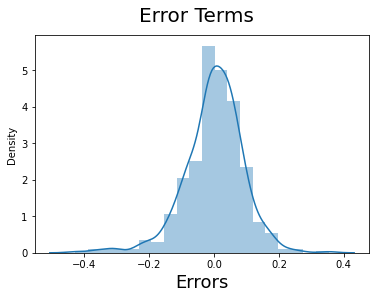

In [176]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

##### Error terms are following normal distribution

In [178]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.55
1,workingday,4.47
3,windspeed,4.11
0,year,2.06
9,spring,1.81
6,saturday,1.79
8,misty,1.55
10,winter,1.44
4,july,1.36
5,september,1.20


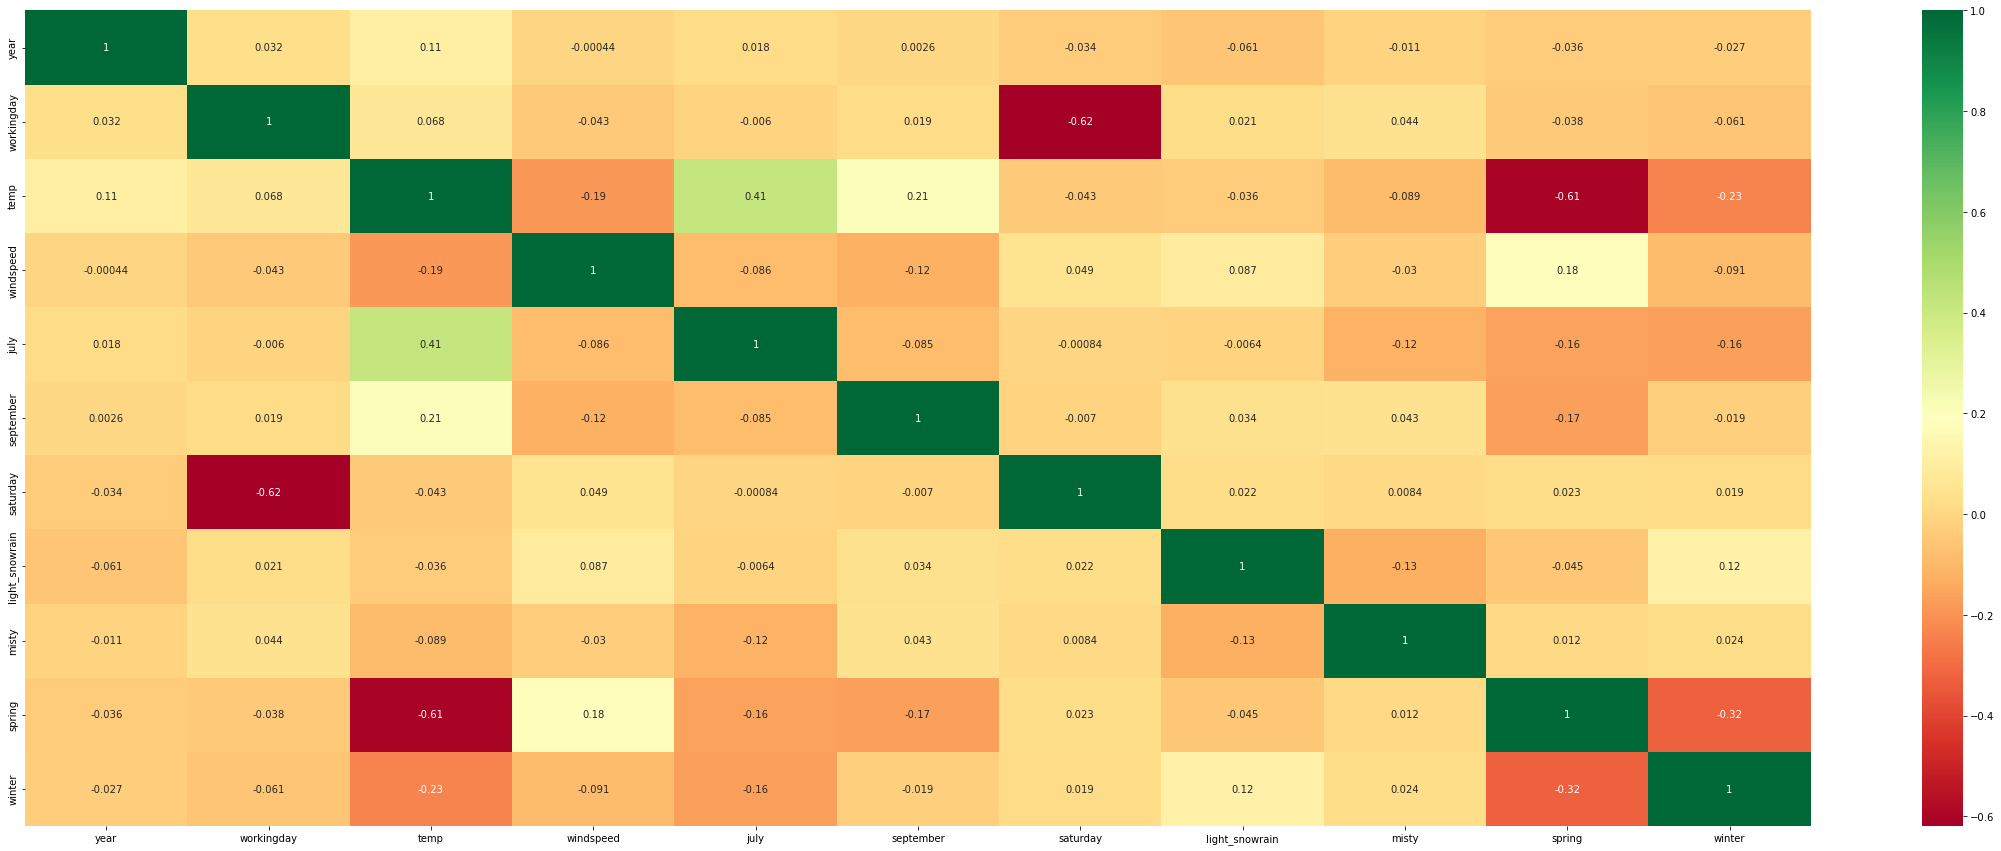

In [179]:
plt.figure(figsize=(40,15))
sns.heatmap(X_train_new.corr(), annot=True, cmap='RdYlGn')
plt.show()

##### VIF values are less than 5 which is good and also there is no multi-colinearity as seen from the heatmap.

#### Linearity

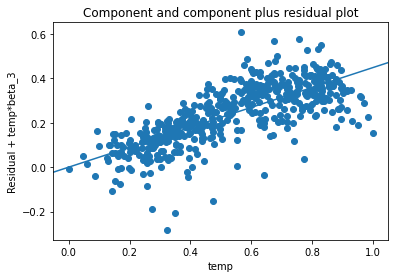

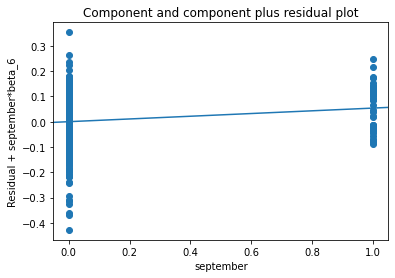

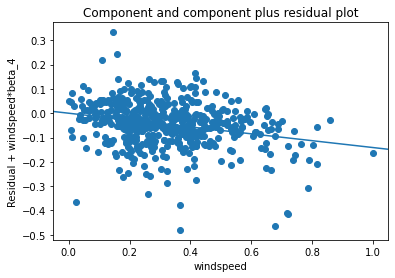

In [183]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5,'temp')

sm.graphics.plot_ccpr(lr_5, 'september')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

##### Linearity can be observed from above visualizations.

#### Homoscedasticity

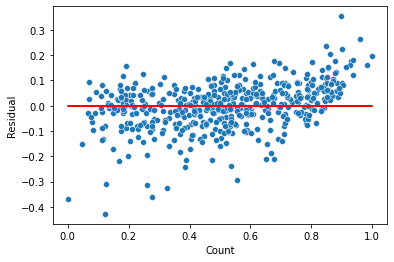

In [188]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

##### No visible pattern observed from above plot for residuals.

#### Independence of residuals
##### Durbin-Watson value of final model lr_5 is 2.013, which signifies there is no autocorrelation.

# Step 7: Making Predictions Using the Final Model
##### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [191]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [192]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,light_snowrain,misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
y_test = df_test.pop('cnt')
X_test = df_test

In [194]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [195]:
y_pred = lr_5.predict(X_test_lm_5)

In [196]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8113

# Step 8: Model Evaluation
##### Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

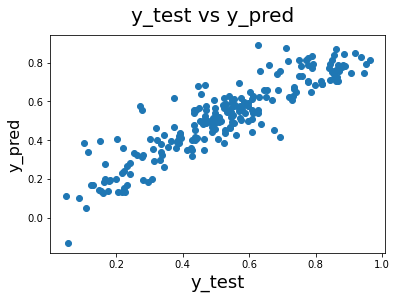

In [198]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [200]:
round(lr_5.params,4)

const             0.2051
year              0.2346
workingday        0.0541
temp              0.4494
windspeed        -0.1412
july             -0.0702
september         0.0538
saturday          0.0657
light_snowrain   -0.2895
misty            -0.0811
spring           -0.1131
winter            0.0457
dtype: float64

##### We can see that the equation of our best fitted line is:
### cnt=0.2051+0.2346*year+0.0541*workingday+0.4494*temp-0.1412*windspeed-0.0702*july+0.0538*september+0.0657*saturday-0.2895*light_snowrain-0.0811*misty-0.1131*spring+0.0457*winter

In [202]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8013


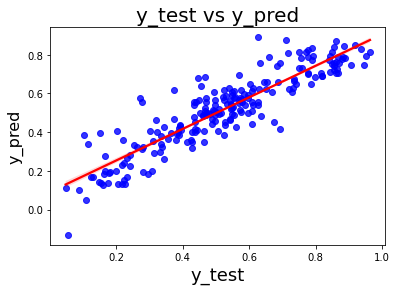

In [203]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:

### - Train dataset R^2          : 0.837
### - Test dataset R^2           : 0.8113
### - Train dataset Adjusted R^2 : 0.833    
### - Test dataset Adjusted R^2  : 0.8013

## Demand of bikes depend on year, workingday, temp, windspeed, july, september, saturday, light_snowrain, misty, spring and winter.